# Euler method

Euler's method is a numerical method to solve first order first degree differential equation with a given initial value. 


\begin{equation*}
    \begin{cases}
    \cfrac{dy}{dt} = f(t,y),
    \\
    y(0) = y_0.
    \end{cases}
\end{equation*}

It is the most basic explicit method for numerical integration of ordinary differential equations.

The idea is that while the curve is initially unknown, its starting point, $P_0=(t_0,y_0)$ is known. Then, from the differential equation, the slope to the curve at $P_0$ can be computed, and so, the tangent line.

Take a small step along that tangent line up to a point $P_1 = (t_1,y_1)$. Along this small step, the slope does not change too much, so $P_1$ will be close to the curve. After several steps, a polygonal curve $P_{0}, P_{1}, P_{2}, P_{3}...$ is computed. In general, this curve does not diverge too far from the original unknown curve, and the error between the two curves can be made small if the step size is small enough and the interval of computation is finite.

<img src="graph_euler_method.png" style="width:400px">

Than, from the fundamental theorem of calculus we can conclude that for the general differential equation

$$\frac{dy}{dt} = f(t,y),$$

the $n$-th step of Euler's method is given by

$$y((n+1)h) = y(nh) + hf(t,y(nh)),$$

where $h = t_{n+1}-t_n$ is some time step choosed.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's try the Euler Method in the below equation for differents uniform step size $h$.

\begin{equation*}
    \begin{cases}
    \cfrac{dy}{dt} = y - \frac{1}{2}e^{\frac{t}{2}}\sin(5t) + 5e^{\frac{t}{2}}\cos(5t),
    \\
    y(0) = 0.
    \end{cases}
\end{equation*}

For more examples see [Paul's Online Notes](http://tutorial.math.lamar.edu/Classes/DE/EulersMethod.aspx)

In [3]:
def euler(step):
    
    # Initializations
    h = step                                # step 
    y_0 = 0                                 # initial value
    t_0 = 0                                 # initial time
    t_end = 5                               # stopping time
    n_steps = int(round((t_end-t_0)/h))     # total number of steps
    
    # Let's create a dictionary with the poits P_n=(y_n,t_n), where t_n's are keys and y_n's are values
    
    P_dic = {}                              
    P_dic[t_0] = y_0                          # add the first point P_0=(y_0,t_0)

    # Euler's method
    t = t_0
    y = P_dic[t_0]

    for i in range (1, n_steps + 1):
        dydt = y-1/2*np.exp(t/2)*np.sin(5*t) + 5*np.exp(t/2)*np.cos(5*t)        # calculate the derivative dy/dt 
        P_dic[i*h] = y + h*dydt
        t = i*h                                                                 # Next Point 
        y = P_dic[i*h] 

    return P_dic

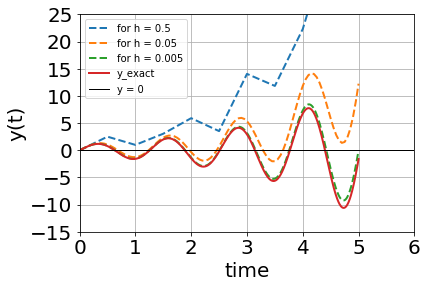

In [4]:
for step in [0.5, 0.05, 0.005]:

    t = np.copy(list(euler(step).keys()))
    y = np.copy(list(euler(step).values()))
   
    # Plot the results
    
    plt.plot(t, y, linewidth = 2, linestyle='dashed')       # plot P_n's


y_exact = np.exp(t/2)*np.sin(5*t)       # Analytical Solution
plt.plot(t, y_exact, linewidth = 2)     # plot y_exact vs. t
   
plt.plot([0,6],[0,0],'k',linewidth=1)
plt.legend(('for h = 0.5','for h = 0.05', 'for h = 0.005', 'y_exact','y = 0'))    
plt.xlabel('time', fontsize = 20)
plt.ylabel('y(t)', fontsize = 20)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(True)                          # show grid 
plt.axis([0, 6, -15, 25])               # define the axes
plt.savefig("contrast.png")             # saving image
plt.show()                              # show the plot


### Let's now create a Dataframe with time as  index and columns that compare the analytic solution with the numerical solution.

In [5]:
# To create a array with the y aproximate by Euler Method 
def aprox(step, times):
    aprox_arr = []
    for t in times:
        y = euler(step)[t]
        aprox_arr.append(y)
    return aprox_arr

# To create a array with the exact y 
def exact(times):
    times = np.array(times)
    exact = np.exp(times/2)*np.sin(5*times)
    return exact

# To know how close the approximation and the exact solution are? 
def Per_Errors(step, times):
    error = 100*((np.abs(exact(times) - aprox(step, times)))/np.abs(exact(times)))
    return error

In [11]:
# Creating the DataFrame.
times = [1, 2, 3, 4, 5]
d = {'Time': times, 'Exact': exact(times), 
     'h = 0.5': aprox(0.5, times), 'h = 0.05': aprox(0.05, times),'h = 0.005': aprox(0.005, times),
     "Error_for h = 0.5": Per_Errors(0.5, times),
     "Error_for h = 0.05": Per_Errors(0.05, times),
     "Error_for h = 0.005": Per_Errors(0.005, times)}
df = pd.DataFrame(data=d)
df

,Time,Exact,h = 0.5,h = 0.05,h = 0.005,Error_for h = 0.5,Error_for h = 0.05,Error_for h = 0.005
0,1,-1.580999,0.986165,-1.265117,-1.548266,162.376056,19.979917,2.070402
1,2,-1.478803,5.903676,-0.343268,-1.358096,499.219970,76.787413,8.162460
2,3,2.914388,14.049215,5.346822,3.182594,382.064003,83.462946,9.202819
3,4,6.745804,22.310829,11.848391,7.330925,230.736412,75.640911,8.673860
4,5,-1.612374,39.418555,12.240178,0.001886,2544.751983,859.139918,100.116991


In [12]:
#Set the DataFrame index using the columns Time.
df = df.set_index('Time')

In [13]:
# Round a DataFrame to a variable number of decimal places.
df = df.round(2)
df

,Exact,h = 0.5,h = 0.05,h = 0.005,Error_for h = 0.5,Error_for h = 0.05,Error_for h = 0.005
Time,,,,,,,
1,-1.58,0.99,-1.27,-1.55,162.38,19.98,2.07
2,-1.48,5.90,-0.34,-1.36,499.22,76.79,8.16
3,2.91,14.05,5.35,3.18,382.06,83.46,9.20
4,6.75,22.31,11.85,7.33,230.74,75.64,8.67
5,-1.61,39.42,12.24,0.00,2544.75,859.14,100.12


In [14]:
# To Apply the simble %
df['Error_for h = 0.5'] = df['Error_for h = 0.5'].astype(str) + '%'
df['Error_for h = 0.05'] = df['Error_for h = 0.05'].astype(str) + '%'
df['Error_for h = 0.005'] = df['Error_for h = 0.005'].astype(str) + '%'
df

,Exact,h = 0.5,h = 0.05,h = 0.005,Error_for h = 0.5,Error_for h = 0.05,Error_for h = 0.005
Time,,,,,,,
1,-1.58,0.99,-1.27,-1.55,162.38%,19.98%,2.07%
2,-1.48,5.90,-0.34,-1.36,499.22%,76.79%,8.16%
3,2.91,14.05,5.35,3.18,382.06%,83.46%,9.2%
4,6.75,22.31,11.85,7.33,230.74%,75.64%,8.67%
5,-1.61,39.42,12.24,0.00,2544.75%,859.14%,100.12%


In [75]:
# Saving the Dataframe as a csv
df.to_csv('euler_method_ex.csv')

# References

- [Mechatronical Modelling/Chapter 7](http://moodle.autolab.uni-pannon.hu/Mecha_tananyag/mechatronikai_modellezes_angol/ch07.html#d0e9679)
- [Paul's Online Notes](http://tutorial.math.lamar.edu/Classes/DE/EulersMethod.aspx)
- [Course Mathematical Modelling Basics](https://www.edx.org/course/mathematical-modelling-basics)
- [Wikipedia/Euler method](https://en.wikipedia.org/wiki/Euler_method)
   
